In [1]:
!ls ../../data

column_names.md          kc_house_data_xtest.csv  kc_house_data_ytest.csv
kc_house_data.csv        kc_house_data_xtrain.csv kc_house_data_ytrain.csv


![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [3]:
# code here to explore your data
df = pd.read_csv('../../data/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [7]:
'''
Categoricals:
1) id
2) date
3) bedrooms
4) bathrooms
5) floors
6) waterfront (not useful)
7) view
8) condition
9) grade
10) yr_built
11) yr_renovated
12) zipcode
13) lat
14) long

Continuous:
1) price
2) sqft_living
3) sqft_lot
4) sqft_above
5) sqft_living15
6) sqft_lot15

Weird:
1) sqft_basement

'''

'\nCategoricals:\n1) id\n2) date\n3) bedrooms\n4) bathrooms\n5) floors\n6) waterfront (not useful)\n7) view\n8) condition\n9) grade\n10) yr_built\n11) yr_renovated\n12) zipcode\n13) lat\n14) long\n\nContinuous:\n1) price\n2) sqft_living\n3) sqft_lot\n4) sqft_above\n5) sqft_living15\n6) sqft_lot15\n\nWeird:\n1) sqft_basement\n\n'

In [8]:
df_xtest = pd.read_csv('../../data/kc_house_data_xtest.csv')
df_xtest

,Unnamed: 0,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3686,2/20/2015,3,0.75,850,8573,1.0,NO,NONE,Average,6 Low Average,600,250.0,1945,0.0,98146,47.5030,-122.356,850,8382
1,10247,10/8/2014,3,1.00,1510,6083,1.0,NO,NONE,Good,6 Low Average,860,650.0,1940,0.0,98115,47.6966,-122.324,1510,5712
2,4037,3/25/2015,4,2.25,1790,42000,1.0,NO,NONE,Average,7 Average,1170,620.0,1983,0.0,98045,47.4819,-121.744,2060,50094
3,3437,2/17/2015,2,1.50,1140,2500,1.0,NO,FAIR,Average,7 Average,630,510.0,1988,NaN,98106,47.5707,-122.359,1500,5000
4,19291,5/23/2014,3,1.00,1500,3920,1.0,NO,NONE,Average,7 Average,1000,500.0,1947,0.0,98107,47.6718,-122.359,1640,4017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,9400,6/17/2014,4,3.50,2650,3060,2.0,NO,NONE,Average,9 Better,2060,590.0,2001,0.0,98103,47.6735,-122.332,1470,3060
6476,9092,12/9/2014,4,2.75,2670,6780,2.0,NO,GOOD,Very Good,8 Good,1630,1040.0,1908,0.0,98118,47.5131,-122.256,2400,5989
6477,6650,6/23/2014,3,1.75,1600,10280,1.0,NaN,NONE,Average,7 Average,1050,550.0,1977,0.0,98034,47.7250,-122.174,1590,8100
6478,21095,8/8/2014,5,3.50,2760,3865,2.5,NO,NONE,Average,8 Good,2760,0.0,2013,0.0,98056,47.5049,-122.170,2590,4587


In [9]:
df_xtrain = pd.read_csv('../../data/kc_house_data_xtrain.csv')
df_xtrain

,Unnamed: 0,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,753,8/28/2014,2,2.50,2380,6600,1.0,NaN,NONE,Average,8 Good,2380,0.0,2010,NaN,98053,47.7170,-122.020,1870,6600
1,1418,4/15/2015,4,3.75,3190,17186,2.0,YES,EXCELLENT,Average,10 Very Good,3190,0.0,1999,0.0,98178,47.5115,-122.246,2290,13496
2,8178,9/3/2014,3,2.50,1730,6930,2.0,NO,NONE,Average,8 Good,1730,0.0,1994,0.0,98003,47.2621,-122.308,1780,6930
3,2254,11/12/2014,4,2.00,1870,8750,1.0,NO,AVERAGE,Average,7 Average,1870,0.0,1977,0.0,98022,47.1985,-122.001,1770,8207
4,4063,2/19/2015,8,3.00,2850,12714,1.0,NaN,NONE,Average,7 Average,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,11964,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,7 Average,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
15113,21575,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,8 Good,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
15114,5390,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,6 Low Average,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
15115,860,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,5 Fair,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [10]:
df_ytest = pd.read_csv('../../data/kc_house_data_ytest.csv')
df_ytest

,Unnamed: 0,price
0,3686,132500.0
1,10247,415000.0
2,4037,494000.0
3,3437,355000.0
4,19291,606000.0
...,...,...
6475,9400,1010000.0
6476,9092,675000.0
6477,6650,442500.0
6478,21095,424950.0


In [11]:
df_ytrain = pd.read_csv('../../data/kc_house_data_ytrain.csv')
df_ytrain

,Unnamed: 0,price
0,753,699800.0
1,1418,1700000.0
2,8178,258000.0
3,2254,245000.0
4,4063,373000.0
...,...,...
15112,11964,440000.0
15113,21575,572000.0
15114,5390,299800.0
15115,860,245000.0


In [12]:
# Looks like floats were used for years instead of integers.
# Looks like 0.0 is used as a placeholder for homes that were not renovated?
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
# From King County Website:
# 5 = Very Good
# 4 = Good
# 3 = Average
# 2 = Fair
# 1 = Poor
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [14]:
# From King County Website:
# 13 is highest quality
# 3 is lowest quality
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [15]:
# Some missing values in this column
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [16]:
# Some missing values in this column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
# MM/DD/YYYY 
# Can't use min/max here
# Looks like only 2014/2015 dates used?
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
3/8/2015       1
11/2/2014      1
5/17/2014      1
5/15/2015      1
8/3/2014       1
Name: date, Length: 372, dtype: int64

In [18]:
# This column is listed as categorical
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [19]:
# Also listed as categorical, but there are lots of 0.0 and ? values which seems strange
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2490.0        1
861.0         1
666.0         1
1245.0        1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [20]:
df['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [21]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [23]:
df['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

In [24]:
# Rocket mortage: location, square footage and the number of bedrooms and bathrooms
'''This could potentially include continuous variables:
        1. 'bedrooms'
        2. 'bathrooms'
        3. 'floors'
        4. 'sqft_living'
        5. 'sqft_lot'
        Also possible for categorical variables:
        1. 'lat'/'long'
        2. 'waterfront'
        3. 'view'
        4. Other data Alex M. talked about
'''
# Opendoor: sale prices of similar homes in your neighborhood that have sold recently
'''This could potentially include categorical variables:
        1. 'sqft_living15'
        2. 'sqft_lot15'
        These might have to be joined/cleaned in some way to determine sale price?
'''
# Inman: Quality of the neighborhood
'''This could potentially include categorical variables:
        1. 'zipcode'
        2. 'lat'/'long'
        These might have to be joined/cleaned in some way to determine sale price?
'''

"This could potentially include categorical variables:\n        1. 'zipcode'\n        2. 'lat'/'long'\n        These might have to be joined/cleaned in some way to determine sale price?\n"

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


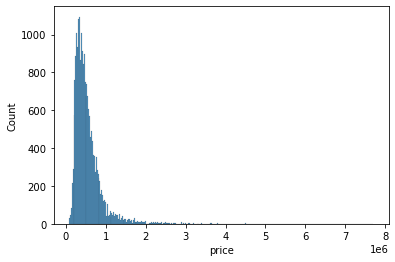

In [26]:
sns.histplot(df['price']);

In [27]:
df_price = df.drop(columns=['id'])
df_price.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


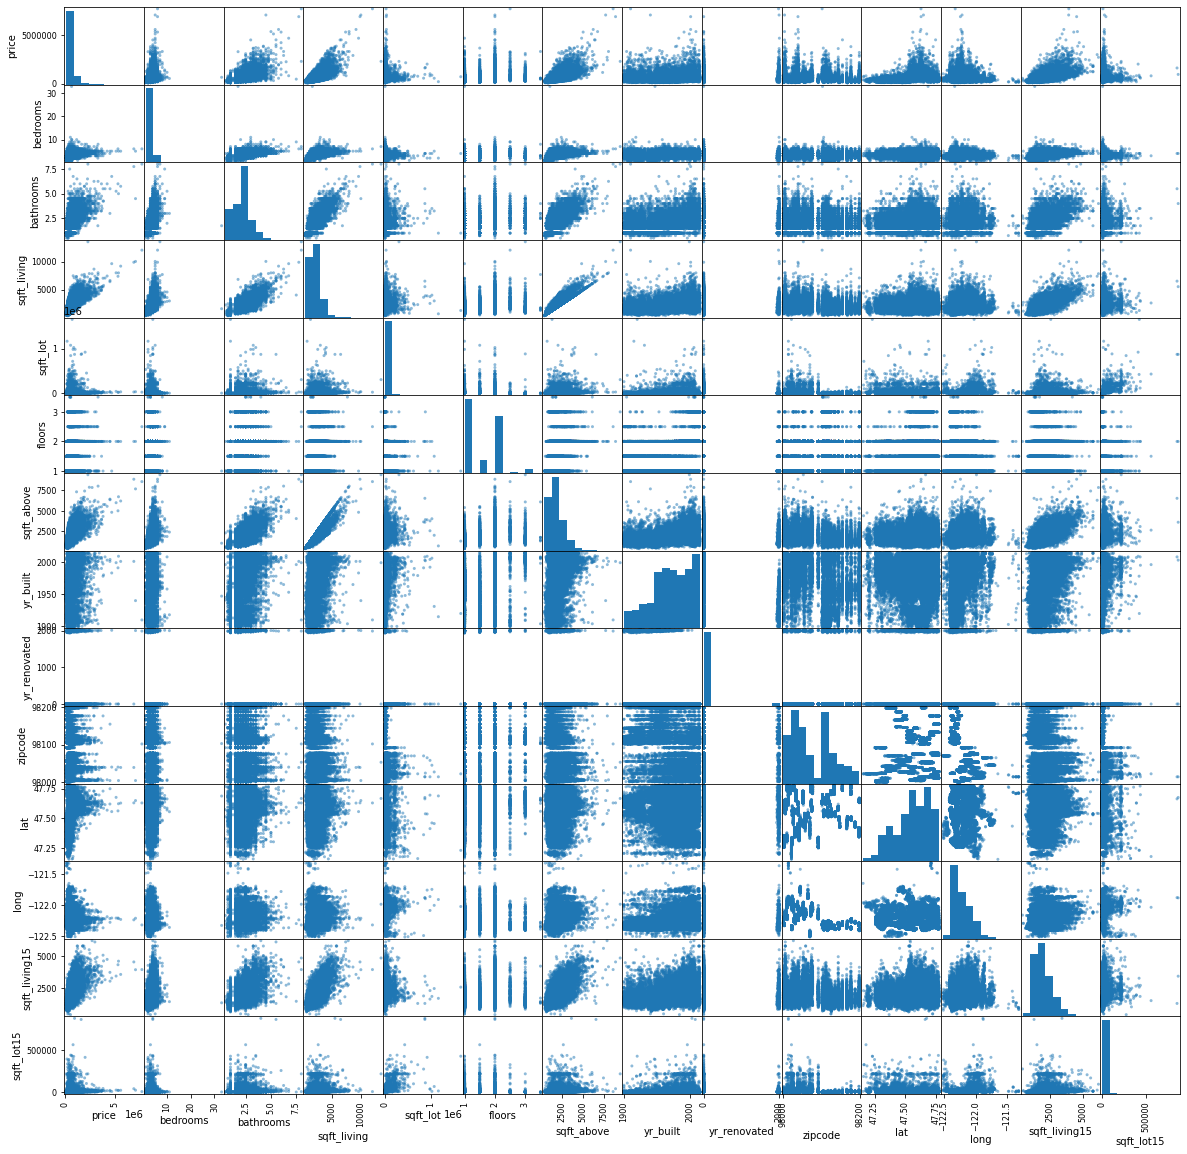

In [28]:
pd.plotting.scatter_matrix(df_price, figsize=(20,20));
plt.show()

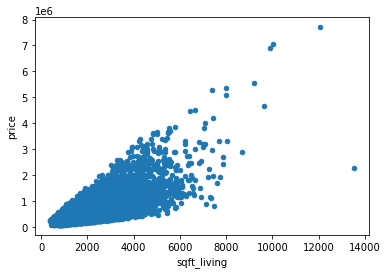

In [29]:
# Strong positive correlation between square footage of living space in the home and price (0.701917)
sqft_living_data = pd.concat([df['price'], df['sqft_living']], axis=1)
sqft_living_data.plot.scatter(x='sqft_living', y='price');

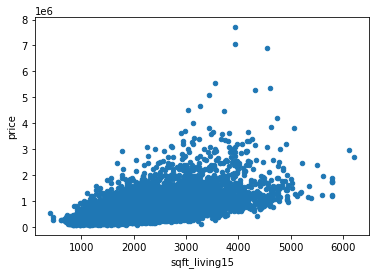

In [30]:
# Perhaps unsurprisingly, there is a similarly strong positive correlation between price and the square footage
# of living space in the neighboring 15 homes and price (0.585241)
sqft_living15_data = pd.concat([df['price'], df['sqft_living15']], axis=1)
sqft_living15_data.plot.scatter(x='sqft_living15', y='price');
# Perhaps this is an area to explore for multiple linear regression models later?

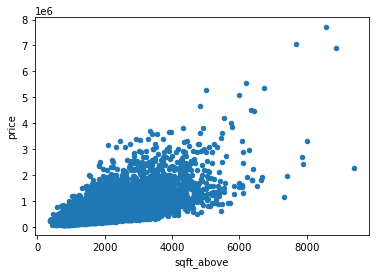

In [31]:
# Relatively strong positive correlation between square footage of the house apart from the basement
# and price (0.605368).
sqft_above_data = pd.concat([df['price'], df['sqft_above']], axis=1)
sqft_above_data.plot.scatter(x='sqft_above', y='price');

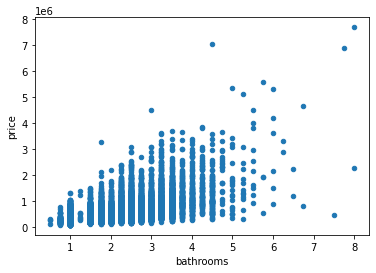

In [32]:
# Relatively strong positive correlation between bathrooms and price (0.525906).
bath_data = pd.concat([df['price'], df['bathrooms']], axis=1)
bath_data.plot.scatter(x='bathrooms', y='price');

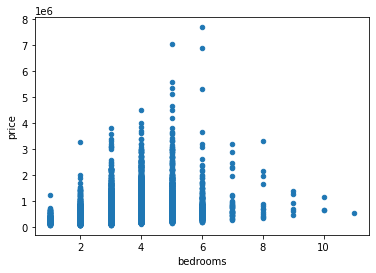

In [33]:
# Dropping row with 33 bedrooms (extreme outlier).
df = df[df['bedrooms'] != 33]
# Looks like normal distribution. Not too strong of a positive correlation (0.308787).
bed_data = pd.concat([df['price'], df['bedrooms']], axis=1)
bed_data.plot.scatter(x='bedrooms', y='price');
# Is "bedrooms" a categorical column?

In [34]:
# R2 value not super high, but unfortunately this is the best we've got (.493)
f_1 = 'price~sqft_living'
model = ols(formula=f_1, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:49   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# R2 value even lower here (.343)
f_2 = 'price~sqft_living15'
model = ols(formula=f_2, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:49   Log-Likelihood:            -3.0285e+05
No. Observations:               21596   AIC:                         6.057e+05
Df Residuals:                   21594   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.308e+04   6216.870    -13.364      0.000   -9.53e+04   -7.09e+04
sqft_living15   313.7813      2.958    106.068      0.000     307.983     319.580
==============================================================================
Omnibus:                    20142.798   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910622.434
Skew:                           4.208   Prob(JB):                         0.00
Kurtosis:                      48.304   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# R2 value still not great (.366)
f_3 = 'price~sqft_above'
model = ols(formula=f_3, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:49   Log-Likelihood:            -3.0245e+05
No. Observations:               21596   AIC:                         6.049e+05
Df Residuals:                   21594   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.972e+04   4737.744     12.604      0.000    5.04e+04     6.9e+04
sqft_above   268.6836      2.404    111.771      0.000     263.972     273.395
==============================================================================
Omnibus:                    16491.699   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728342.999
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# UGH (.277)
f_4 = 'price~bathrooms'
model = ols(formula=f_4, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:49   Log-Likelihood:            -3.0388e+05
No. Observations:               21596   AIC:                         6.078e+05
Df Residuals:                   21594   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8692.1645   6224.949      1.396      0.163   -3509.195    2.09e+04
bathrooms   2.512e+05   2765.109     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17250.830   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882666.007
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.549   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# WOOF (.100)
f_5 = 'price~bedrooms'
model = ols(formula=f_5, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2395.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:49   Log-Likelihood:            -3.0624e+05
No. Observations:               21596   AIC:                         6.125e+05
Df Residuals:                   21594   BIC:                         6.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.074e+05   9158.506     11.726      0.000    8.94e+04    1.25e+05
bedrooms    1.284e+05   2623.513     48.937      0.000    1.23e+05    1.34e+05
==============================================================================
Omnibus:                    18918.536   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168858.729
Skew:                           3.941   Prob(JB):                         0.00
Kurtosis:                      38.169   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df['floors'].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

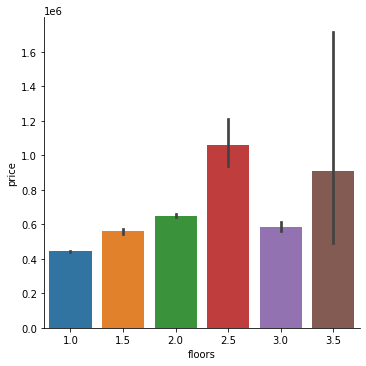

In [40]:
sns.catplot(x = 'floors', y = 'price', kind = 'bar', data = df);

In [41]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

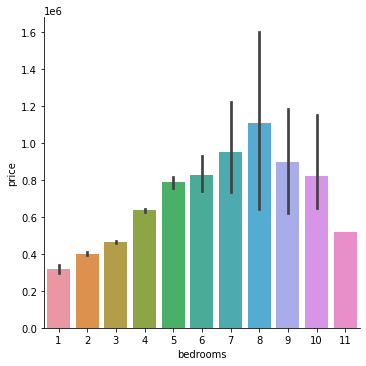

In [42]:
sns.catplot(x = 'bedrooms', y = 'price', kind = 'bar', data = df);

In [43]:
df_many_beds = df[df['bedrooms'] >= 7]
df_many_beds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,NaN,FAIR,...,11 Excellent,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697
1134,4024100951,1/5/2015,420000.0,7,3.00,2940,8624,1.0,NO,NONE,...,8 Good,1690,1250.0,1977,NaN,98155,47.7555,-122.307,1850,8031
1239,7227802030,6/23/2014,350000.0,7,3.00,2800,9569,1.0,NO,AVERAGE,...,7 Average,1400,1400.0,1963,0.0,98056,47.5102,-122.183,2150,7333
1658,9126101740,12/4/2014,490000.0,8,5.00,2800,2580,2.0,NO,NONE,...,8 Good,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
3717,5451100490,1/15/2015,884900.0,7,4.75,5370,10800,1.5,NO,NONE,...,8 Good,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18808,4040500100,10/20/2014,539000.0,7,2.25,2620,6890,2.0,NO,NONE,...,7 Average,2620,0.0,1961,0.0,98007,47.6123,-122.134,2070,7910
18960,1778360150,6/20/2014,1240000.0,7,5.50,6630,13782,2.0,NO,NONE,...,10 Very Good,4930,1700.0,2004,NaN,98006,47.5399,-122.118,4470,8639
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,...,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
19287,3756900027,11/25/2014,575000.0,8,3.00,3840,15990,1.0,NO,NONE,...,7 Average,2530,1310.0,1961,0.0,98034,47.7111,-122.211,1380,8172


In [44]:
df_some_beds = df[(df['bedrooms'] >= 4) & (df['bedrooms'] <= 6)]
df_some_beds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,7 Average,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,NO,GOOD,...,9 Better,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
17,6865200140,5/29/2014,485000.0,4,1.00,1600,4300,1.5,NO,NONE,...,7 Average,1600,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,9 Better,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.0,5,3.75,4470,8088,2.0,NO,NONE,...,11 Excellent,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200


In [45]:
df_few_beds = df[df['bedrooms'] <= 3]
df_few_beds

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [46]:
df_many_baths = df[df['bathrooms'] >= 5]
df_many_baths

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
527,3225079035,6/18/2014,1600000.0,6,5.00,6050,230652,2.0,NaN,GOOD,...,11 Excellent,6050,0.0,2001,0.0,98024,47.6033,-121.943,4210,233971
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,YES,EXCELLENT,...,12 Luxury,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,YES,NaN,...,12 Luxury,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20968,2149800278,10/15/2014,343000.0,6,5.00,2732,7655,2.0,NO,NONE,...,7 Average,2732,0.0,2009,0.0,98002,47.3045,-122.211,3078,69993
21034,2424059170,2/19/2015,900000.0,5,6.00,7120,40806,2.0,NO,EXCELLENT,...,12 Luxury,5480,1640.0,2007,0.0,98006,47.5451,-122.114,3440,36859
21132,524059063,5/6/2014,1800000.0,5,5.00,4490,10279,2.0,NO,NONE,...,10 Very Good,3930,560.0,2013,0.0,98004,47.5974,-122.202,2490,10279
21328,8835770170,8/22/2014,1490000.0,5,6.00,6880,279968,2.0,NO,GOOD,...,12 Luxury,4070,2810.0,2007,0.0,98045,47.4624,-121.779,4690,256803


In [47]:
df_some_baths = df[(df['bathrooms'] >= 3) & (df['bathrooms'] < 5)]
df_some_baths

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,NO,GOOD,...,9 Better,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
58,7922800400,8/27/2014,951000.0,5,3.25,3250,14342,2.0,NO,EXCELLENT,...,8 Good,3250,0.0,1968,NaN,98008,47.5880,-122.116,2960,11044
59,8079040320,2/23/2015,430000.0,4,3.00,1850,9976,2.0,NO,NONE,...,8 Good,1850,0.0,1991,0.0,98059,47.5059,-122.149,2270,8542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,NO,AVERAGE,...,10 Very Good,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,NO,NONE,...,10 Very Good,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,9 Better,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.0,5,3.75,4470,8088,2.0,NO,NONE,...,11 Excellent,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964


In [48]:
df_few_baths = df[df['bathrooms'] < 3]
df_few_baths

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


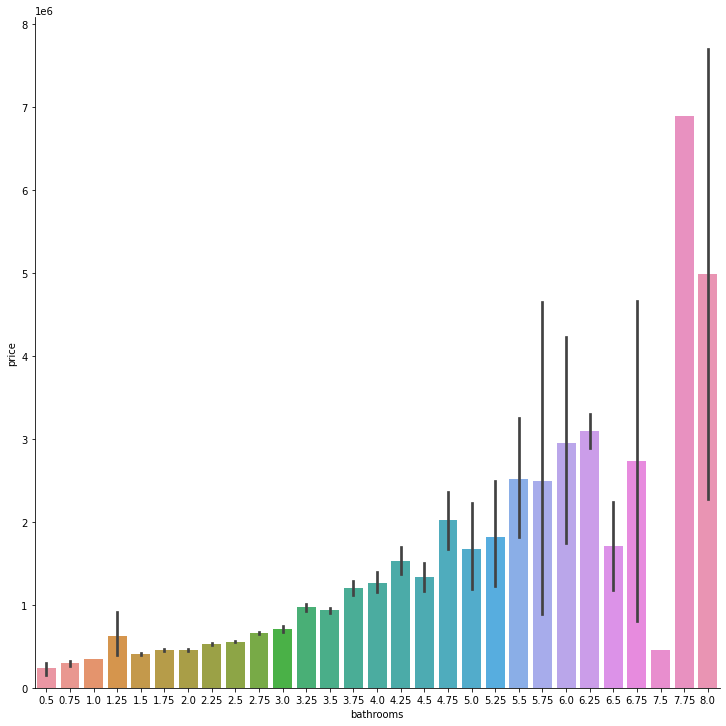

In [49]:
sns.catplot(x = 'bathrooms', y = 'price', kind = 'bar', data = df, height = 10);

In [50]:
f_6 = 'price ~ bedrooms + bathrooms'
model = ols(formula=f_6, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     4170.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:51   Log-Likelihood:            -3.0385e+05
No. Observations:               21596   AIC:                         6.077e+05
Df Residuals:                   21593   BIC:                         6.077e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.578e+04   8429.186     -4.244      0.000   -5.23e+04   -1.93e+04
bedrooms     2.16e+04   2765.271      7.811      0.000    1.62e+04     2.7e+04
bathrooms   2.378e+05   3251.138     73.156      0.000    2.31e+05    2.44e+05
==============================================================================
Omnibus:                    17333.302   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904088.202
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      33.928   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Highest R2 score for these variables
f_7 = 'price ~ bathrooms'
model = ols(formula=f_7, data = df_some_beds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     3497.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:23:51   Log-Likelihood:            -1.2503e+05
No. Observations:                8755   AIC:                         2.501e+05
Df Residuals:                    8753   BIC:                         2.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.831e+05    1.5e+04    -12.215      0.000   -2.12e+05   -1.54e+05
bathrooms   3.384e+05   5721.590     59.138      0.000    3.27e+05     3.5e+05
==============================================================================
Omnibus:                     6053.431   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179486.413
Skew:                           2.922   Prob(JB):                         0.00
Kurtosis:                      24.398   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Highest R2 score for these variables
f_7 = 'price ~ bedrooms'
model = ols(formula=f_7, data = df_few_baths).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1230.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.15e-261
Time:                        12:23:51   Log-Likelihood:            -2.6191e+05
No. Observations:               18966   AIC:                         5.238e+05
Df Residuals:                   18964   BIC:                         5.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.394e+05   7041.436     33.997      0.000    2.26e+05    2.53e+05
bedrooms    7.343e+04   2093.411     35.077      0.000    6.93e+04    7.75e+04
==============================================================================
Omnibus:                     9604.223   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101330.327
Skew:                           2.200   Prob(JB):                         0.00
Kurtosis:                      13.433   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

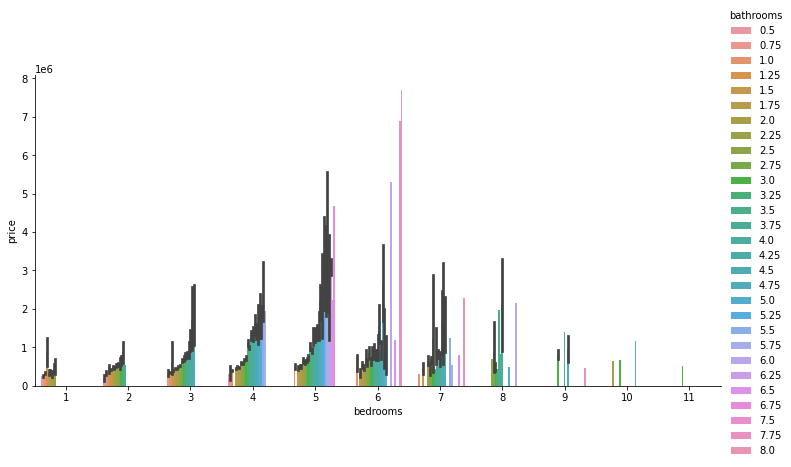

In [53]:
sns.catplot(x = 'bedrooms', y = 'price', kind = 'bar', hue = 'bathrooms', data = df, aspect = 2);

In [54]:
# Remove all values larger than 7
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [55]:
# Remove all values larger than 7
df['bathrooms'].value_counts(ascending = True)

7.75       1
7.50       1
6.50       2
6.75       2
6.25       2
8.00       2
0.50       4
5.75       4
6.00       6
1.25       9
5.50      10
5.25      13
5.00      21
4.75      23
0.75      71
4.25      79
4.50     100
4.00     136
3.75     155
3.25     589
3.50     731
3.00     753
2.75    1185
1.50    1445
2.00    1930
2.25    2047
1.75    3047
1.00    3851
2.50    5377
Name: bathrooms, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  object 
 9   view           21533 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

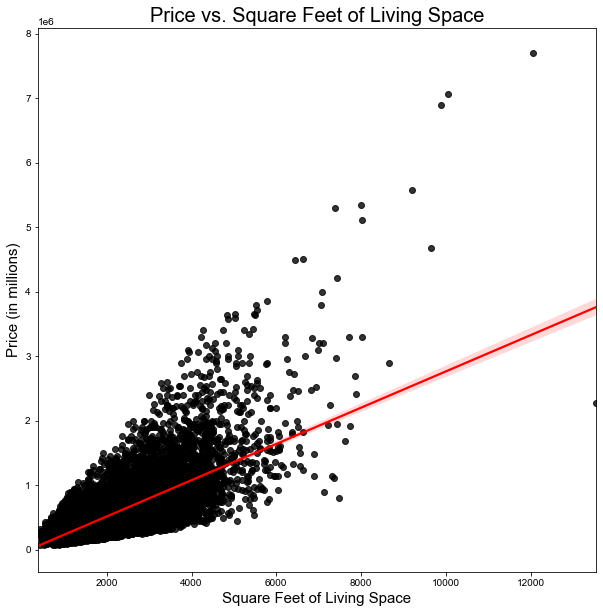

In [57]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.regplot(x="sqft_living", y="price", data= df, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Price vs. Square Feet of Living Space', fontsize=20)
plt.xlabel('Square Feet of Living Space', fontsize=15)
plt.ylabel('Price (in millions)', fontsize=15)
sns.set_style("whitegrid")

plt.show;

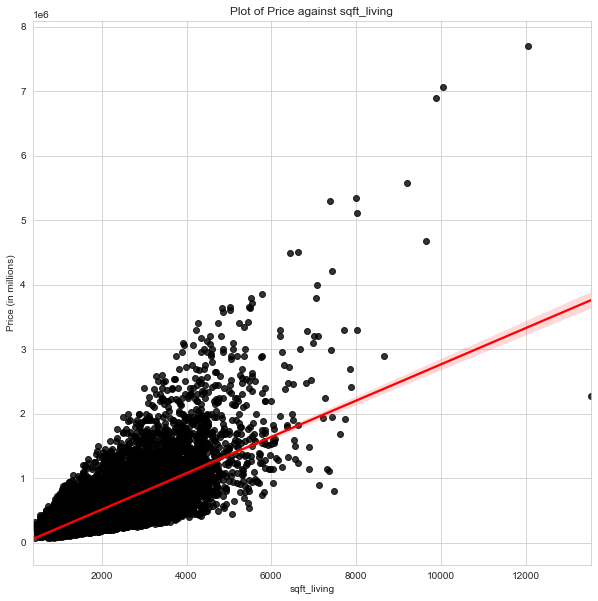

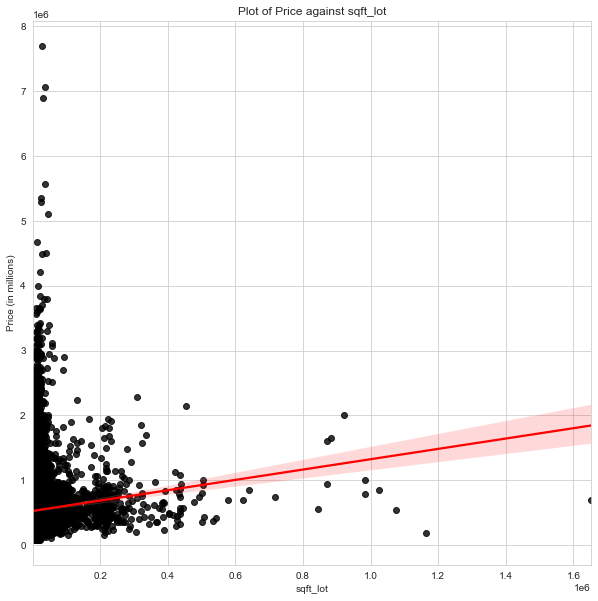

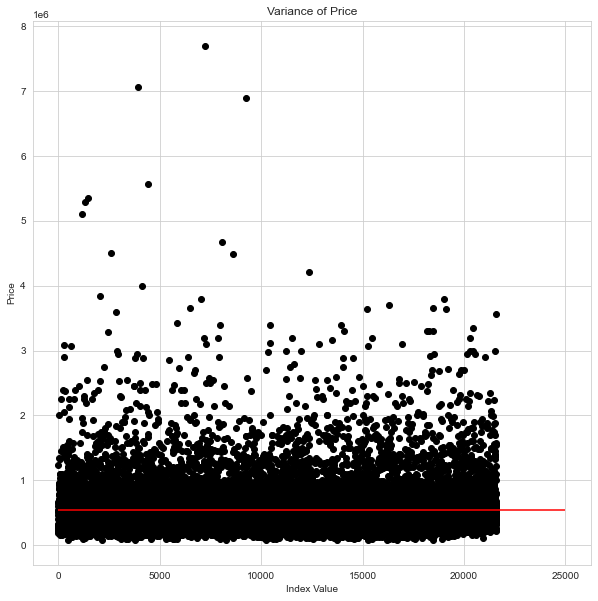

In [58]:
features = ['sqft_living', 'sqft_lot']

for x in features:
    fig, ax = plt.subplots(figsize = (10,10))
    ax = sns.regplot(x = df[x], y = df['price'], data= df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
    sns.set_style("whitegrid")
    plt.title(f'Plot of Price against {x}')
    plt.xlabel(x)
    plt.ylabel('Price (in millions)')
    plt.show()

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(df['price'].index, df['price'], c = 'black')
plt.hlines(df['price'].mean(), xmin=0, xmax=25000, colors = 'red')
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show();

In [59]:
df['price'].describe()


count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

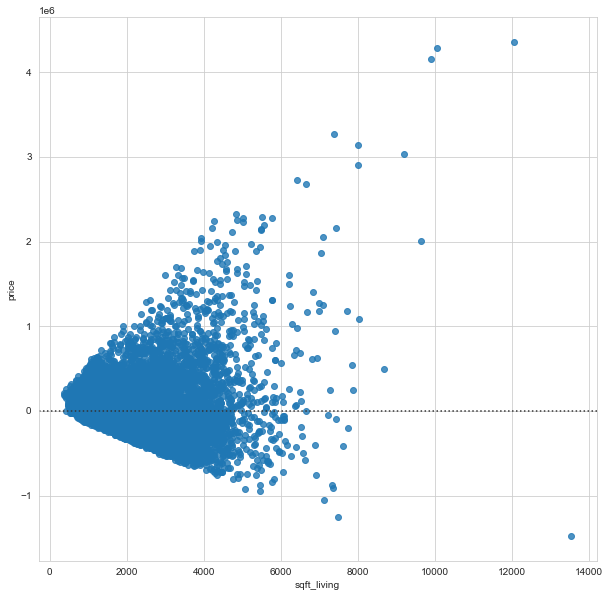

In [60]:
fig, ax = plt.subplots(figsize = (10,10))
sns.residplot(x=df['sqft_living'], y=df['price'])
plt.show()

In [61]:
non_normal = ['price']
for feat in non_normal:
    df[feat] = df.loc[feat].map(lambda x: np.log(x))

KeyError: 'price'

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
